In [12]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [9]:
data.isnull().sum().head(70)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Working Capital/Equity                                     0
 Current Liabilities/Equity                                 0
 Long-term Liability to Current Assets                      0
 Retained Earnings to Total Assets                          0
 Total income/Total expense                                 0
Length: 70, dtype: int64

In [10]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


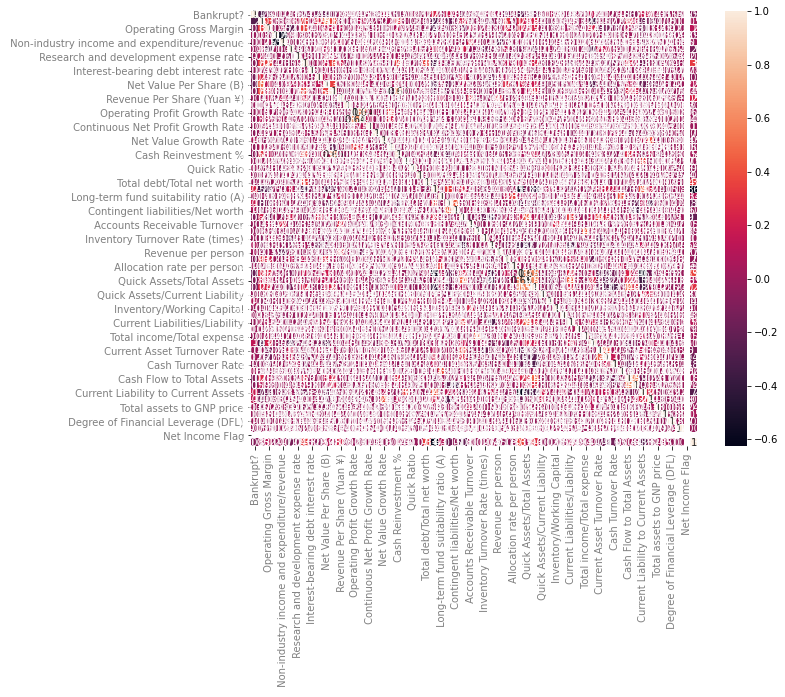

In [34]:
correlations_drpmatrix = data_dropped.corr()
fig, ax = plt.subplots(figsize=(10, 8))
g = sns.heatmap(correlations_drpmatrix, annot=True)
for tick_label in g.axes.get_yticklabels():
    tick_label.set_color("grey")
    tick_label.set_fontsize("10")
for tick_label in g.axes.get_xticklabels():
    tick_label.set_color("grey")
    tick_label.set_fontsize("10")
plt.show()

In [59]:
high_corr_threshold = 0.8
highly_correlated_pairs = []

for i in range(len(correlations_matrix.columns)):
    for j in range(i):
        if abs(correlations_matrix.iloc[i, j]) > high_corr_threshold:
            col_pair = (correlations_matrix.columns[i], correlations_matrix.columns[j], correlations_matrix.iloc[i, j])
            highly_correlated_pairs.append(col_pair)

for pair in highly_correlated_pairs:
    print(f"Columns: {pair[0]} and {pair[1]} - Correlation: {pair[2]}")

Columns:  ROA(A) before interest and % after tax and  ROA(C) before interest and depreciation before interest - Correlation: 0.9401237079700807
Columns:  ROA(B) before interest and depreciation after tax and  ROA(C) before interest and depreciation before interest - Correlation: 0.9868494970182541
Columns:  ROA(B) before interest and depreciation after tax and  ROA(A) before interest and % after tax - Correlation: 0.9557406252835042
Columns:  Realized Sales Gross Margin and  Operating Gross Margin - Correlation: 0.9995182781255221
Columns:  Pre-tax net Interest Rate and  Operating Profit Rate - Correlation: 0.9164477798560053
Columns:  After-tax net Interest Rate and  Operating Profit Rate - Correlation: 0.8621907071596802
Columns:  After-tax net Interest Rate and  Pre-tax net Interest Rate - Correlation: 0.9863790242582028
Columns:  Continuous interest rate (after tax) and  Operating Profit Rate - Correlation: 0.9155437834862158
Columns:  Continuous interest rate (after tax) and  Pre-

In [60]:
import pandas as pd

high_corr_threshold = 0.7
columns_to_drop = set()  

for i in range(len(correlations_matrix.columns)):
    for j in range(i):
        if abs(correlations_matrix.iloc[i, j]) > high_corr_threshold:
          
            col_to_drop = correlations_matrix.columns[i]
            columns_to_drop.add(col_to_drop)


data_dropped = data.drop(columns=columns_to_drop, errors='ignore') 
print(f"Dropping columns: {columns_to_drop}")

Dropping columns: {' Net Value Per Share (A)', ' Retained Earnings to Total Assets', ' Working capitcal Turnover Rate', ' Current Liability to Equity', ' Net Value Per Share (C)', ' Per Share Net profit before tax (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Net Worth Turnover Rate (times)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow to Sales', ' Gross Profit to Sales', ' ROA(B) before interest and depreciation after tax', ' Continuous interest rate (after tax)', ' Realized Sales Gross Margin', ' Net worth/Assets', ' Liability to Equity', ' Current Assets/Total Assets', ' Net Income to Total Assets', ' Working Capital/Equity', ' Net profit before tax/Paid-in capital', ' Cash Flow to Liability', ' Pre-tax net Interest Rate', ' CFO to Assets', ' After-tax net Interest Rate', ' Current Liability to Assets', ' Current Liability to Liability', ' Inventory and accounts receivable/Net value', ' Current Liabilities/Equity', ' Operating profit/Paid-in capital', ' Regular Ne

In [61]:
data_dropped

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,...,0.637555,0.312905,0.118250,0,0.009219,0.622879,0.026601,0.564050,1,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,...,0.641100,0.314163,0.047775,0,0.008323,0.623652,0.264577,0.570175,1,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,...,0.642765,0.314515,0.025346,0,0.040003,0.623841,0.026555,0.563706,1,0.016474
3,1,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.000000e+00,0.465705,4.490449e-04,0.000000,...,0.579039,0.302382,0.067250,0,0.003252,0.622929,0.026697,0.564663,1,0.023982
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.000000e+00,0.462746,6.860686e-04,0.000000,...,0.622374,0.311567,0.047725,0,0.003878,0.623521,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.604455,0.998992,0.303510,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,...,0.639806,0.314063,0.027951,0,0.000466,0.623620,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.598308,0.998992,0.303520,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,...,0.642072,0.314446,0.031470,0,0.001959,0.623931,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.610444,0.998984,0.303512,2.509312e-04,1.039086e-04,0.472189,0.000000e+00,0.490839,...,0.631678,0.313353,0.007542,0,0.002840,0.624156,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.607850,0.999074,0.303498,1.236154e-04,2.510000e+09,0.476123,2.110211e-04,0.181294,...,0.684857,0.320118,0.022916,0,0.002837,0.623957,0.026822,0.565302,1,0.044009


In [71]:
test_high_variance_corr = test_high_variance['Bankrupt?'].sort_values()


test_high_variance_corr.head(30)


3409    0
4533    0
4532    0
4531    0
4530    0
4529    0
4528    0
4527    0
4526    0
4525    0
4524    0
4534    0
4523    0
4521    0
4520    0
4519    0
4518    0
4517    0
4516    0
4515    0
4514    0
4513    0
4512    0
4522    0
4511    0
4535    0
4537    0
4559    0
4558    0
4557    0
Name: Bankrupt?, dtype: int64

In [51]:
correlations_drpmatrix = data_dropped.corr()
bankruptcy_correlations = correlations_matrix['Bankrupt?'].sort_values()

bankruptcy_correlations.tail(10)

 Liability-Assets Flag                  0.139212
 Current Liability to Equity            0.153828
 Current Liabilities/Equity             0.153828
 Liability to Equity                    0.166812
 Current Liability to Current Assets    0.171306
 Borrowing dependency                   0.176543
 Current Liability to Assets            0.194494
 Debt ratio %                           0.250161
Bankrupt?                               1.000000
 Net Income Flag                             NaN
Name: Bankrupt?, dtype: float64

In [31]:
data_dropped.shape

(6819, 62)

In [50]:
variances = data.var()

sorted_variances = variances.sort_values(ascending=False)

print(sorted_variances.head(10))

 Quick Asset Turnover Rate                1.139025e+19
 Inventory Turnover Rate (times)          1.054929e+19
 Operating Expense Rate                   1.048260e+19
 Cash Turnover Rate                       8.635506e+18
 Total Asset Growth Rate                  8.396768e+18
 Current Asset Turnover Rate              7.958951e+18
 Research and development expense rate    6.751119e+18
 Fixed Assets Turnover Frequency          6.138290e+18
 Inventory/Current Liability              3.387840e+17
 Long-term Liability to Current Assets    3.252086e+17
dtype: float64


In [57]:

high_variance_threshold = variances.quantile(0.75)


low_variance_columns = variances[variances <= high_variance_threshold].index.tolist()


data_high_variance = data.drop(columns=low_variance_columns)


print(f"Dropped columns: {low_variance_columns}")
print(data_high_variance.head())

Dropped columns: ['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Cash flow rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Interest Expense Ratio', ' Debt ratio %', ' Net w

In [64]:
test_variance_threshold = 0.02


low_variance_columns = variances[variances <= test_variance_threshold].index.tolist()

test_high_variance = data.drop(columns=low_variance_columns)

print(f"Dropped columns: {low_variance_columns}")
print(test_high_variance.head())

Dropped columns: [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Cash flow rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Interest Expense Ratio', ' Debt ratio %', ' Net worth/Assets',

In [69]:
test_high_variance

,Bankrupt?,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,...,Cash/Current Liability,Inventory/Current Liability,Current Liabilities/Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Current Liability to Liability,Total assets to GNP price
0,1,1.256969e-04,0.000000e+00,7.250725e-04,0.017560,4.980000e+09,0.000327,0.002259,0.001208,0.021266,...,1.473360e-04,0.001036,0.676269,2.559237e-02,7.010000e+08,6.550000e+09,4.580000e+08,0.424206,0.676269,0.009219
1,1,2.897851e-04,0.000000e+00,6.470647e-04,0.021144,6.110000e+09,0.000443,0.006016,0.004039,0.012502,...,1.383910e-03,0.005210,0.308589,2.394682e-02,1.065198e-04,7.700000e+09,2.490000e+09,0.468828,0.308589,0.008323
2,1,2.361297e-04,2.550000e+07,7.900790e-04,0.005944,7.280000e+09,0.000396,0.011543,0.005348,0.021248,...,5.340000e+09,0.013879,0.446027,3.715116e-03,1.791094e-03,1.022676e-03,7.610000e+08,0.276179,0.446027,0.040003
3,1,1.078888e-04,0.000000e+00,4.490449e-04,0.014368,4.880000e+09,0.000382,0.004194,0.002896,0.009572,...,1.010646e-03,0.003540,0.615848,2.216520e-02,8.140000e+09,6.050000e+09,2.030000e+09,0.559144,0.615848,0.003252
4,1,7.890000e+09,0.000000e+00,6.860686e-04,0.029690,5.510000e+09,0.000439,0.006022,0.003727,0.005150,...,6.804636e-04,0.004869,0.975007,0.000000e+00,6.680000e+09,5.050000e+09,8.240000e+08,0.309555,0.975007,0.003878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,1.510213e-04,4.500000e+09,1.790179e-04,0.020766,7.070000e+09,0.000450,0.010451,0.005457,0.006655,...,5.071548e-03,0.013212,0.786888,1.792237e-03,2.294154e-04,1.244230e-04,1.077940e-04,0.400338,0.786888,0.000466
6815,0,5.220000e+09,1.440000e+09,2.370237e-04,0.023050,5.220000e+09,0.000445,0.009259,0.006741,0.004623,...,4.727181e-03,0.006730,0.849898,2.204673e-03,1.517299e-04,1.173396e-04,7.710000e+09,0.096136,0.849898,0.001959
6816,0,2.509312e-04,1.039086e-04,0.000000e+00,0.044255,5.990000e+09,0.000435,0.038424,0.035112,0.001392,...,8.821248e-02,0.007810,0.553964,0.000000e+00,1.762272e-04,1.749713e-04,4.074263e-04,0.055509,0.553964,0.002840
6817,0,1.236154e-04,2.510000e+09,2.110211e-04,0.031535,7.250000e+09,0.000529,0.012782,0.007256,0.003816,...,7.133218e-03,0.013334,0.893241,3.200000e+09,2.135940e-04,1.351937e-04,1.165392e-04,0.246805,0.893241,0.002837


In [ ]:
### BREAK ###

In [72]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [73]:
test_high_variance.head()

,Bankrupt?,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,...,Cash/Current Liability,Inventory/Current Liability,Current Liabilities/Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Current Liability to Liability,Total assets to GNP price
0,1,1.256969e-04,0.0,0.000725,0.017560,4.980000e+09,0.000327,0.002259,0.001208,0.021266,...,1.473360e-04,0.001036,0.676269,0.025592,7.010000e+08,6.550000e+09,4.580000e+08,0.424206,0.676269,0.009219
1,1,2.897851e-04,0.0,0.000647,0.021144,6.110000e+09,0.000443,0.006016,0.004039,0.012502,...,1.383910e-03,0.005210,0.308589,0.023947,1.065198e-04,7.700000e+09,2.490000e+09,0.468828,0.308589,0.008323
2,1,2.361297e-04,25500000.0,0.000790,0.005944,7.280000e+09,0.000396,0.011543,0.005348,0.021248,...,5.340000e+09,0.013879,0.446027,0.003715,1.791094e-03,1.022676e-03,7.610000e+08,0.276179,0.446027,0.040003
3,1,1.078888e-04,0.0,0.000449,0.014368,4.880000e+09,0.000382,0.004194,0.002896,0.009572,...,1.010646e-03,0.003540,0.615848,0.022165,8.140000e+09,6.050000e+09,2.030000e+09,0.559144,0.615848,0.003252
4,1,7.890000e+09,0.0,0.000686,0.029690,5.510000e+09,0.000439,0.006022,0.003727,0.005150,...,6.804636e-04,0.004869,0.975007,0.000000,6.680000e+09,5.050000e+09,8.240000e+08,0.309555,0.975007,0.003878


In [74]:
data_dropped.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.0,0.458143,0.000725,0.0,...,0.637555,0.312905,0.118250,0,0.009219,0.622879,0.026601,0.564050,1,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.0,0.461867,0.000647,0.0,...,0.641100,0.314163,0.047775,0,0.008323,0.623652,0.264577,0.570175,1,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,25500000.0,0.458521,0.000790,0.0,...,0.642765,0.314515,0.025346,0,0.040003,0.623841,0.026555,0.563706,1,0.016474
3,1,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.0,0.465705,0.000449,0.0,...,0.579039,0.302382,0.067250,0,0.003252,0.622929,0.026697,0.564663,1,0.023982
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.0,0.462746,0.000686,0.0,...,0.622374,0.311567,0.047725,0,0.003878,0.623521,0.024752,0.575617,1,0.035490


In [77]:
### PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


pca = PCA(n_components=2)  
pca_result = pca.fit_transform(data_scaled)


pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])



print(pca_df.head())

print(f"Explained variance by component: {pca.explained_variance_ratio_}")

   Principal Component 1  Principal Component 2
0              -7.805386               0.516733
1              -3.179079              -0.819591
2              -4.782747              -0.244225
3              -6.294097              -1.236157
4              -2.819902              -0.035688
Explained variance by component: [0.13304217 0.07144656]


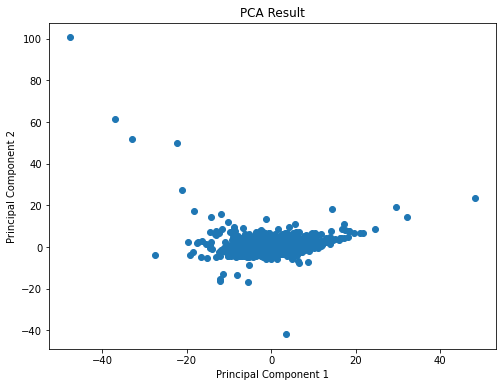

In [78]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])  
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()